In [189]:
#importing libraries

import random as rd
import hashlib
import phe
import rsa
import matplotlib.pyplot as plt
from timeit import default_timer as timer


In [190]:
#declaring of varibles
numberOfExperts = 0
numberOfCandidates = 0
#collection of homomophic public and private keys
dictionaryOfExpertPublicKeys = {}
dictionaryOfExpertPrivateKeys = {}

dictionaryOfCandidatesPublicKeys = {}
dictionaryOfCandidatesPrivateKeys = {}

publicKeyEmployer,privateKeyEmployer = 0,0

#Collection of rsa public and private keys for digital signature
dictOfrsaPubKey = {}
dictOfrsaPriKey = {}
marksToCandidates = []


In [191]:
#this part of the code create the public and private homomorphic key pairs
def generateHomomorphickeyPairs():
    global publicKeyEmployer,privateKeyEmployer
    publicKeyEmployer,privateKeyEmployer = phe.generate_paillier_keypair(n_length= 512)
    for i in range(numberOfExperts):
        x,y = phe.generate_paillier_keypair(n_length= 512)
        dictionaryOfExpertPublicKeys[i] = x
        dictionaryOfExpertPrivateKeys[i] = y
        
    for i in range(numberOfCandidates):
        x,y = phe.generate_paillier_keypair(n_length= 512)
        dictionaryOfCandidatesPublicKeys[i]= x
        dictionaryOfCandidatesPrivateKeys[i] = y 

In [192]:
#code to generate rsa public and private keys
def generateRSAKeys():
    global dictOfrsaPubKey, dicOfrsaPriKey
    for i in range(numberOfExperts):
        (pubkey, privkey) = rsa.newkeys(512)
        dictOfrsaPubKey[i],dictOfrsaPriKey[i] = pubkey, privkey 

In [193]:
def initVariables(E,C):
    global numberOfExperts, numberOfCandidates
    numberOfExperts, numberOfCandidates = E, C

In [194]:
# function to create digital signature
def createDigitalSignature(message,i):
    privkey = dictOfrsaPriKey[i]
    temp = str(message).encode()
    signature = rsa.sign(temp, privkey, 'SHA-1')
    return signature

In [195]:
# tjhis part of the code works as the employer of the seconde frame work who finds the est candidate
def employerFindingBestCandidate(array):
    array = [privateKeyEmployer.raw_decrypt(x) for x in array]
    print(array.index(max(array)))
    print(array)

In [196]:
# this part of the code works as the candidate manager who adds the marks by multiplication of the encrytpion and than passes them to the employer
def candidateManagerFrameWork2BestCandidate():
    array  = []
    for i in range(len(marksToCandidates[0])):
        sum = 1
        for j in range(len(marksToCandidates)):
            sum = sum * marksToCandidates[j][i][0]
        array.append(sum)
    return array
  

In [197]:
def expertFunctionToGiveMarks():
    global marksToCandidates
    marksToCandidates = [[0 for i in range(numberOfCandidates)] for j in range(numberOfExperts)]
    #this part of code simulates the expert giving marks to the candidates and storing them in form of matrix
    for i in range(numberOfExperts):
        for j in range(numberOfCandidates):
            mark = rd.randint(0,10)
            encryptedMark = publicKeyEmployer.raw_encrypt(mark)
            marksToCandidates[i][j] = [encryptedMark,createDigitalSignature(mark,i)]
    
    

In [198]:
def plotGraph(a,b):
    plt.plot(a,b,marker = "*")
    plt.xlabel("numberOfcandidates")
    plt.ylabel("time Consumed")
    plt.show()

2
[53, 41, 55, 41, 45]


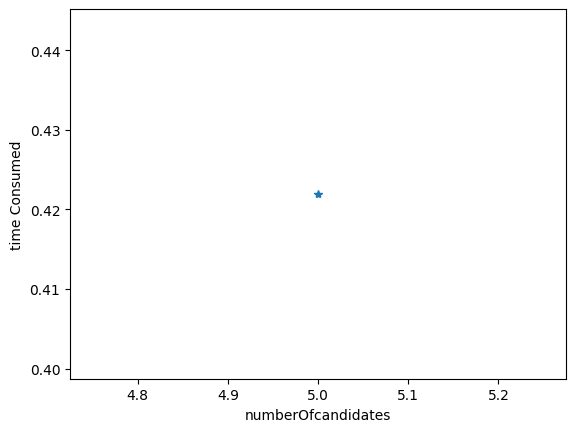

0
[63, 54, 42, 47, 52, 29, 48, 49, 62, 54]


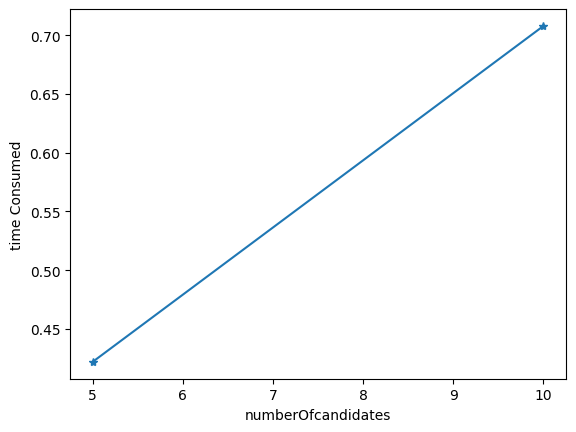

7
[50, 63, 52, 50, 57, 55, 33, 64, 48, 45, 49, 56, 56, 55, 48, 40, 64, 56, 48, 51]


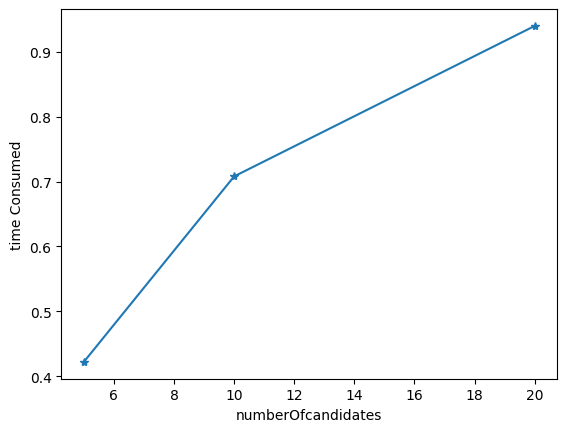

11
[46, 38, 60, 68, 39, 54, 53, 41, 59, 54, 38, 69, 59, 41, 62, 46, 51, 43, 47, 43, 37, 48, 47, 68, 45, 47, 50, 45, 39, 65]


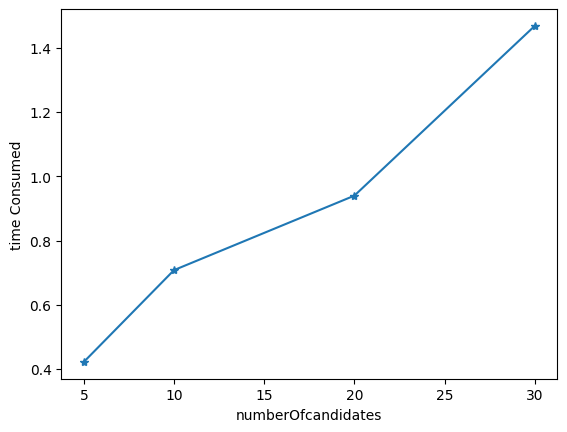

10
[65, 59, 44, 59, 53, 41, 67, 45, 65, 34, 68, 57, 40, 64, 68, 49, 48, 64, 46, 48, 55, 54, 39, 63, 41, 58, 40, 37, 40, 68, 39, 48, 58, 38, 28, 39, 48, 62, 62, 50]


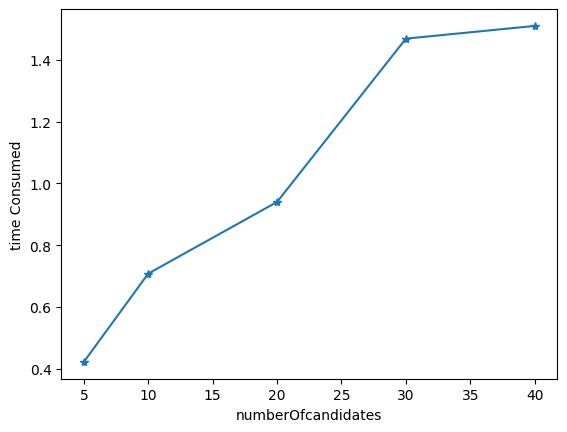

29
[45, 38, 56, 39, 38, 36, 41, 40, 48, 56, 51, 51, 57, 48, 55, 36, 64, 66, 62, 41, 49, 52, 58, 51, 55, 40, 46, 50, 68, 70, 44, 51, 53, 46, 56, 44, 42, 56, 42, 70, 55, 47, 56, 51, 61, 54, 53, 50, 47, 31]


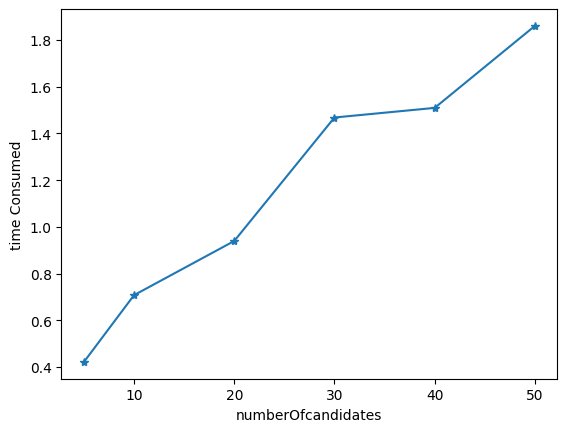

51
[33, 64, 45, 71, 60, 37, 57, 50, 47, 60, 61, 36, 57, 53, 45, 66, 31, 57, 30, 39, 60, 58, 54, 51, 57, 37, 46, 42, 52, 54, 57, 57, 55, 41, 39, 43, 45, 43, 55, 44, 54, 43, 55, 57, 53, 58, 45, 32, 44, 44, 35, 73, 47, 56, 42, 61, 47, 49, 73, 48]


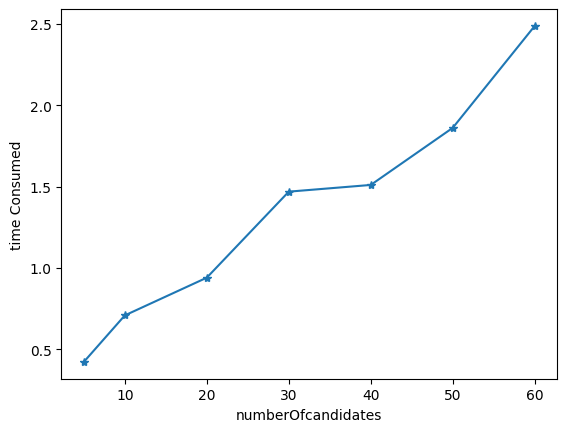

59
[63, 49, 53, 34, 60, 45, 51, 55, 66, 60, 48, 20, 40, 54, 46, 50, 51, 54, 51, 39, 55, 41, 42, 38, 63, 60, 57, 53, 50, 41, 51, 41, 57, 49, 33, 49, 42, 65, 69, 58, 57, 40, 40, 56, 66, 63, 52, 52, 66, 50, 50, 52, 36, 52, 41, 50, 56, 60, 46, 77, 61, 54, 43, 48, 69, 51, 55, 47, 69, 35]


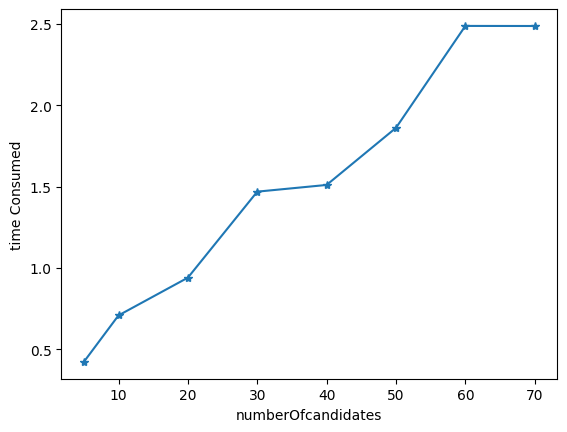

16
[29, 47, 48, 43, 47, 41, 46, 56, 62, 47, 44, 51, 49, 63, 38, 50, 75, 42, 52, 39, 36, 59, 32, 53, 35, 55, 48, 32, 68, 69, 56, 62, 51, 54, 47, 48, 54, 52, 61, 41, 59, 35, 38, 56, 37, 56, 45, 58, 55, 75, 48, 57, 50, 46, 46, 42, 60, 58, 40, 56, 33, 60, 53, 60, 40, 56, 54, 56, 60, 65, 44, 33, 58, 48, 59, 37, 45, 53, 48, 41]


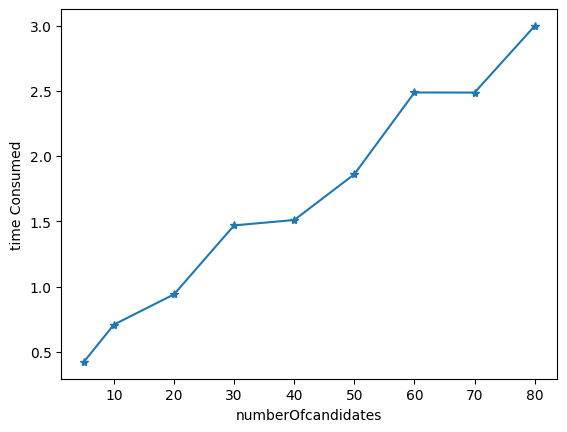

26
[46, 47, 57, 47, 69, 56, 38, 52, 43, 41, 56, 46, 54, 40, 47, 56, 68, 49, 52, 38, 52, 61, 38, 44, 38, 37, 75, 54, 41, 48, 48, 48, 52, 42, 56, 61, 62, 28, 54, 52, 47, 56, 50, 57, 38, 34, 52, 50, 56, 55, 40, 60, 57, 64, 47, 54, 58, 37, 50, 23, 51, 50, 63, 53, 48, 57, 47, 55, 62, 37, 27, 49, 63, 39, 46, 40, 49, 59, 70, 37, 41, 44, 44, 43, 46, 42, 48, 68, 42, 36]


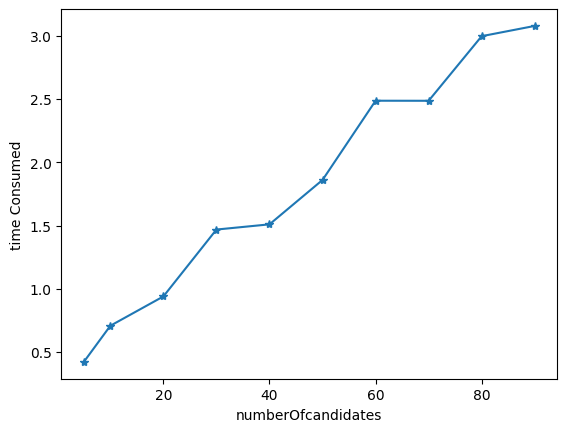

48
[55, 53, 42, 47, 65, 35, 65, 53, 48, 57, 48, 40, 51, 59, 63, 50, 67, 44, 58, 38, 50, 53, 66, 49, 48, 42, 56, 55, 65, 52, 47, 45, 26, 57, 43, 63, 53, 59, 58, 74, 52, 44, 29, 43, 40, 51, 48, 64, 79, 41, 57, 39, 64, 65, 79, 72, 39, 60, 49, 45, 48, 58, 53, 53, 67, 48, 45, 42, 54, 41, 49, 52, 45, 50, 52, 39, 48, 48, 56, 40, 45, 66, 46, 61, 39, 41, 49, 40, 57, 50, 61, 39, 44, 37, 47, 50, 55, 53, 62, 47]


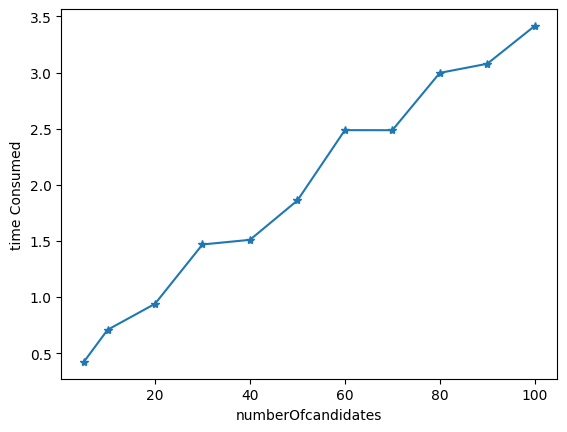

24
[45, 51, 51, 50, 63, 41, 47, 40, 47, 53, 64, 41, 44, 46, 51, 56, 63, 51, 45, 49, 60, 64, 51, 46, 73, 44, 53, 67, 63, 52, 47, 37, 46, 49, 36, 63, 40, 55, 62, 41, 55, 25, 51, 53, 56, 39, 39, 31, 51, 54, 59, 30, 53, 59, 30, 47, 51, 50, 53, 54, 60, 49, 41, 31, 49, 49, 64, 45, 55, 42, 70, 56, 40, 56, 42, 54, 48, 31, 49, 46, 61, 60, 61, 59, 39, 53, 44, 56, 53, 61, 54, 61, 52, 36, 53, 48, 45, 43, 42, 42, 39, 51, 37, 66, 46, 52, 62, 54, 32, 57]


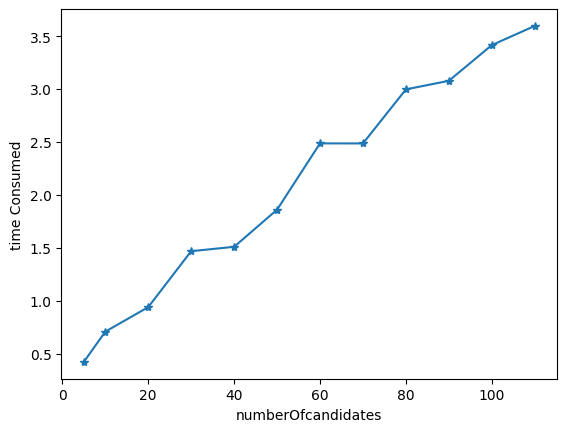

10
[40, 61, 40, 46, 55, 52, 59, 45, 47, 48, 70, 49, 47, 68, 51, 44, 34, 66, 42, 53, 52, 62, 49, 59, 35, 49, 31, 33, 53, 35, 53, 44, 49, 63, 34, 42, 54, 58, 50, 44, 52, 68, 65, 55, 47, 53, 47, 58, 47, 48, 39, 60, 56, 56, 40, 30, 50, 48, 57, 64, 40, 52, 51, 69, 55, 47, 45, 65, 36, 40, 68, 50, 49, 51, 44, 64, 46, 60, 43, 44, 51, 21, 36, 62, 48, 49, 40, 52, 46, 49, 46, 48, 43, 57, 43, 29, 39, 52, 47, 40, 67, 58, 49, 42, 51, 49, 56, 65, 64, 56, 49, 64, 54, 41, 44, 45, 54, 42, 55, 55]


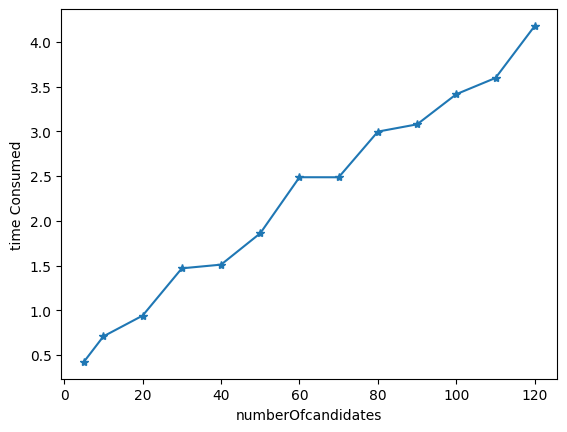

37
[49, 53, 38, 42, 31, 49, 50, 66, 50, 48, 58, 38, 48, 33, 57, 52, 55, 49, 46, 52, 53, 42, 46, 62, 35, 47, 51, 72, 38, 58, 49, 55, 57, 53, 45, 60, 44, 74, 35, 52, 49, 60, 40, 52, 54, 53, 62, 43, 57, 54, 34, 37, 30, 57, 50, 34, 56, 40, 52, 42, 34, 38, 48, 46, 49, 60, 55, 46, 55, 60, 55, 58, 67, 46, 39, 61, 42, 35, 56, 36, 43, 49, 44, 71, 13, 40, 42, 50, 54, 45, 30, 46, 51, 60, 37, 59, 48, 54, 43, 44, 57, 49, 50, 56, 56, 53, 54, 40, 48, 48, 60, 51, 58, 45, 47, 36, 50, 56, 42, 53, 42, 59, 65, 65, 47, 58, 45, 50, 62, 46]


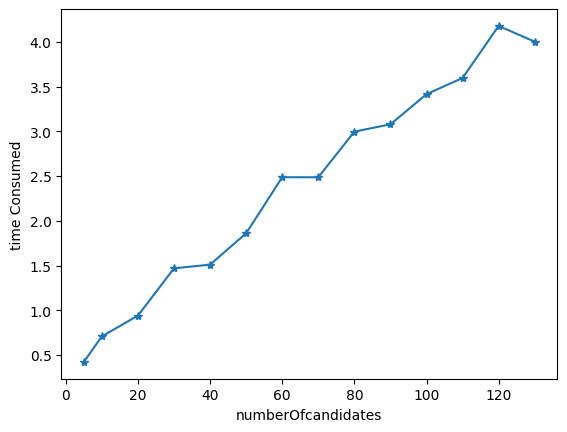

In [199]:
experts = 10
timeList = []
candidates = [5,10,20,30,40,50,60,70,80,90,100,110,120,130]
for i in range(len(candidates)):
    start = timer()
    initVariables(experts, candidates[i])
    generateHomomorphickeyPairs()
    generateRSAKeys()
    expertFunctionToGiveMarks()
    array = candidateManagerFrameWork2BestCandidate()
    employerFindingBestCandidate(array)
    end = timer()
    timeList.append(end - start)
    plotGraph(candidates[0:i+1],timeList)
# print(marksToCandidates)

In [200]:
print(timeList)

[0.42194585900142556, 0.7078566939999291, 0.9397739220003132, 1.468410175999452, 1.509605792001821, 1.860579937001603, 2.486956463999377, 2.4864672500007146, 2.997169414000382, 3.0782866820009076, 3.4154990690003615, 3.5968795900007535, 4.178654356997868, 4.002323833999981]


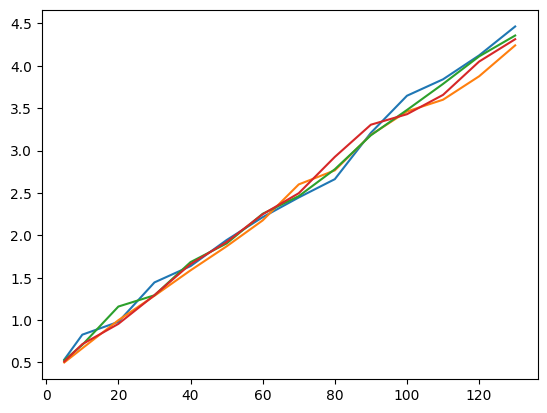

In [201]:
plt.plot(candidates,[0.5338188810019346, 0.8278695029985101, 0.9792202570024529, 1.4443124419995002, 1.6363760980020743, 1.9437913549991208, 2.2136241370026255, 2.446165490000567, 2.6622101399989333, 3.2087563249988307, 3.6461170019974816, 3.8400340099979076, 4.122036176002439, 4.463217836997501])
plt.plot(candidates,[0.4998960829980206, 0.6668834440024511, 0.9986106639989885, 1.2864480560019729, 1.5864105119981105, 1.869656668000971, 2.1756335930003843, 2.6002870650008845, 2.765889568003331, 3.1851531799984514, 3.4606850749987643, 3.5993404030014062, 3.8755834460025653, 4.240267593999306]
)
plt.plot(candidates,[0.5256980349986407, 0.7071788319990446, 1.1596830990019953, 1.2923821399999724, 1.6835694420005893, 1.9037116370018339, 2.253603581997595, 2.461766585998703, 2.7790778649978165, 3.179832951998833, 3.4783225760002097, 3.7857355250016553, 4.110228175999509, 4.356666905998281]
)
plt.plot(candidates,[0.5106264749992988, 0.7158502059974126, 0.9551274689983984, 1.293977627003187, 1.6604486129981524, 1.9204257099991082, 2.2480410440002743, 2.4964137009992555, 2.9246178870016593, 3.3046064589980233, 3.4283234029971936, 3.656323182000051, 4.049199443001271, 4.313133937997918])
plt.show()

In [216]:
start = timer()
publicKeyEmployer.raw_encrypt(100)
end = timer()
print(end-start)

0.0016884120013855863
